In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
new_probability  = np.loadtxt('./Model/fit_results_3d.csv', delimiter=',', dtype=str)
results          = np.loadtxt('./Model/model_prob_3d.csv', delimiter=',', dtype=str)

In [3]:
my_probability = {}
for i in range(len(new_probability[0, :])):                             # Converting numpy array into dictionary
    my_probability[new_probability[0, i]] = np.array(new_probability[0 + 1:, i], dtype=str)

In [4]:
my_results = {}
for i in range(len(results[0, :])):                             # Converting numpy array into dictionary
    my_results[results[0, i]] = np.array(results[0 + 1:, i], dtype=str)

In [5]:
parameter    = my_probability['parameter'].astype(str)
quartile_1st = my_probability['25%'].astype(float)
quartile_2st = my_probability['75%'].astype(float)
quantile_25  = my_probability['2.5%'].astype(float)
quantile_97  = my_probability['97.5%'].astype(float)
mean         = my_probability['mean'].astype(float)

In [6]:
probability = my_results['pnew'].astype(float)
redshift    = my_results['redshift'].astype(float)
sersic_gal  = my_results['SERSIC_GALFIT'].astype(float)
sersic_sex  = my_results['SERSIC_SEXTRACTOR'].astype(float)

In [7]:
print mean.size
print probability.size
print redshift.size
print sersic_gal.size
print sersic_sex.size

9611
2401
2401
2401
2401


In [8]:
print parameter[5449]

etanew[640]


In [9]:
idx_beg = []
idx_end = []
for i in range(parameter.size):
    if (parameter[i]=='pnew[0]'):
        idx_beg = int(i)
        print idx_beg
        print 'ok'
    elif (parameter[i]=='pnew[2400]'):
        idx_end = int(i)
        print idx_end
        print 'ok'
    else:
        continue

7210
ok
9610
ok


In [10]:
new_q1 = quartile_1st[idx_beg:idx_end+1]
new_q2 = quartile_2st[idx_beg:idx_end+1]
new_25 = quantile_25[idx_beg:idx_end+1]
new_97 = quantile_97[idx_beg:idx_end+1]
new_param = parameter[idx_beg:idx_end+1]
new_mean = mean[idx_beg:idx_end+1]

In [11]:
# interp_function_01 = s.interp1d(redshift, mean)
# new_redshift = np.linspace(redshift.min(), redshift.max(), 200)
# new_probability = interp_function_01(new_redshift)
# print mean.size

In [12]:
print new_mean.size

2401


In [13]:
print redshift.size

2401


In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


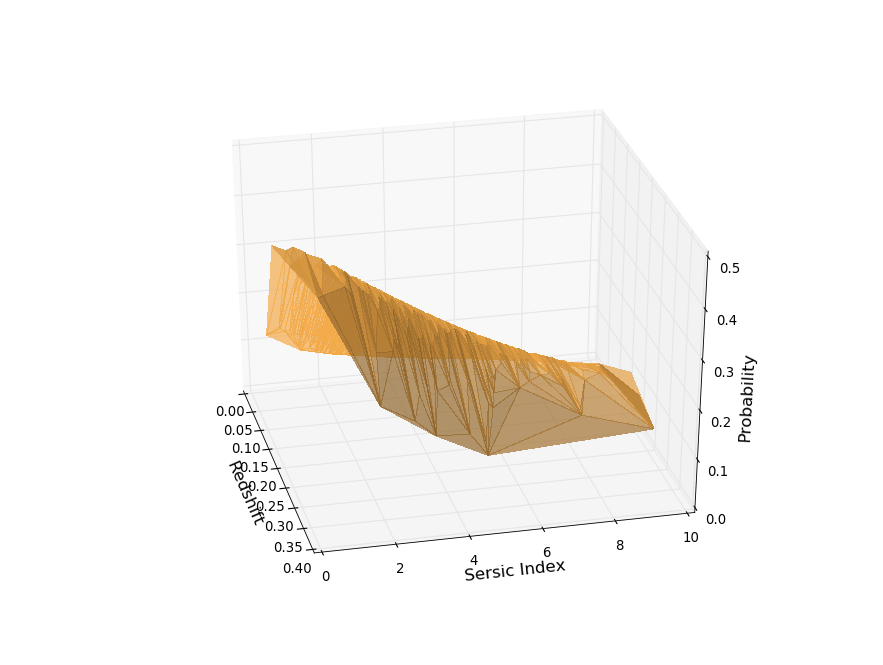

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plt.scatter(redshift, sersic_gal, mean, c = '#feb24c', alpha=0.7)
ax.plot_trisurf(redshift, sersic_gal, new_mean, color='#feb24c', alpha=0.7, linewidth=0, antialiased=False)
ax.set_xlabel("Redshift", fontsize=15)
ax.set_ylabel("Sersic Index", fontsize=15)
ax.set_zlabel("Probability", fontsize=15)
plt.show()

<IPython.core.display.Javascript object>


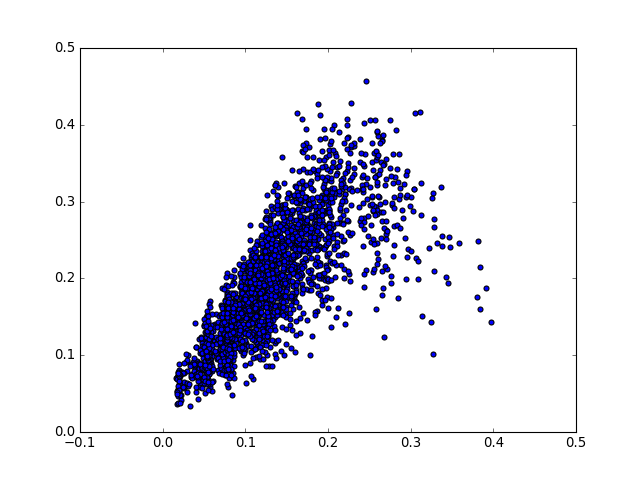

In [20]:
plt.scatter(redshift, new_mean)
plt.show()

<IPython.core.display.Javascript object>


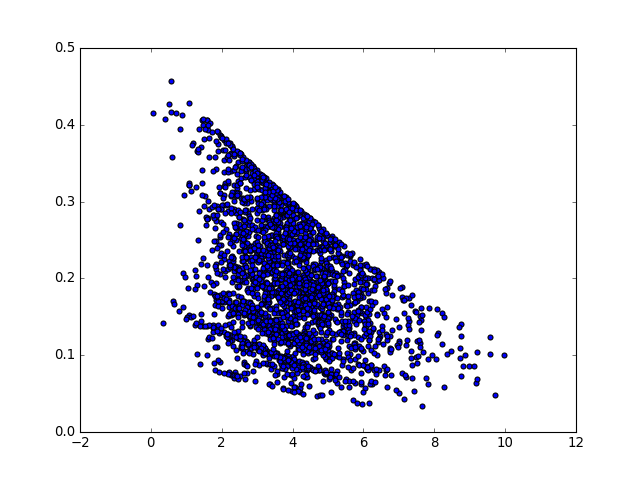

In [21]:
plt.scatter(sersic_gal, new_mean)
plt.show()